# AIM : Exploratory data analysis on the Iris dataset to understand its characteristics and relationships between features.

## Load the dataset


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the dataset to a Pandas DataFrame
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
df_iris['species'] = iris.target

# Map target integer values to their string names
df_iris['species'] = df_iris['species'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the first few rows of the DataFrame
display(df_iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data exploration

In [ ]:
# Display the first 5 rows
display(df_iris.head())

# Check for missing values
display(df_iris.isnull().sum())

# Display summary statistics
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize distributions


Visualizing distribution for: sepal length (cm)


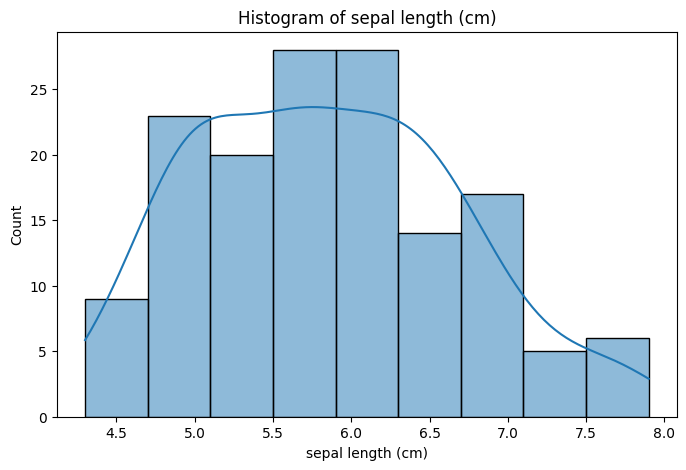

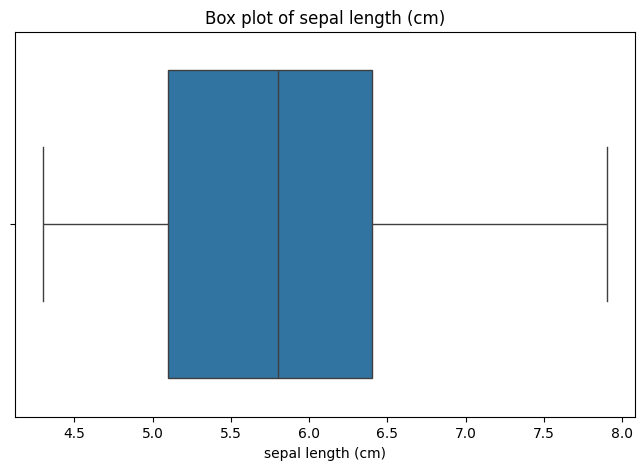

Visualizing distribution for: sepal width (cm)


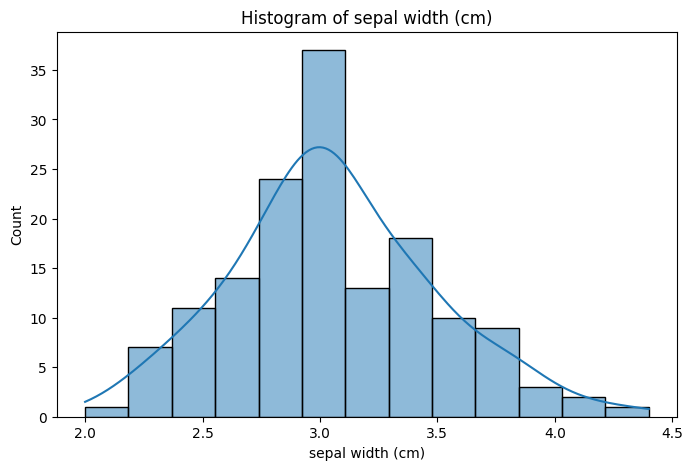

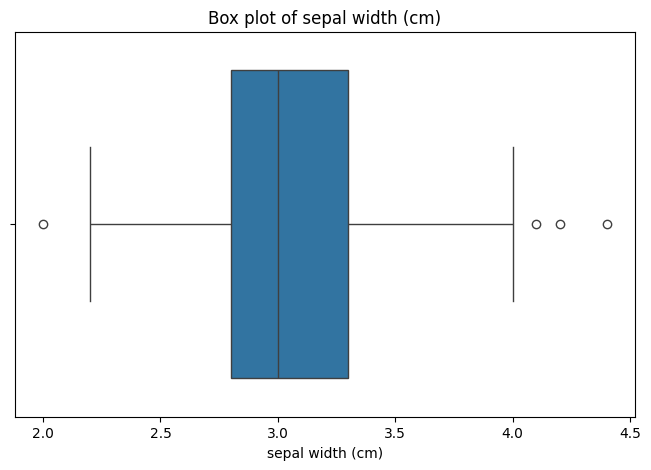

Visualizing distribution for: petal length (cm)


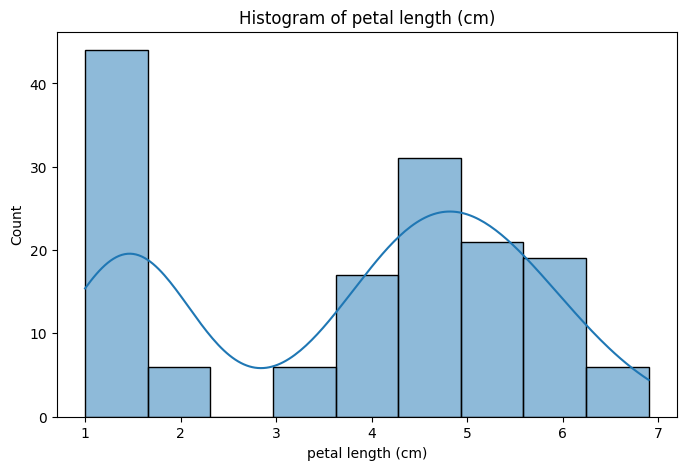

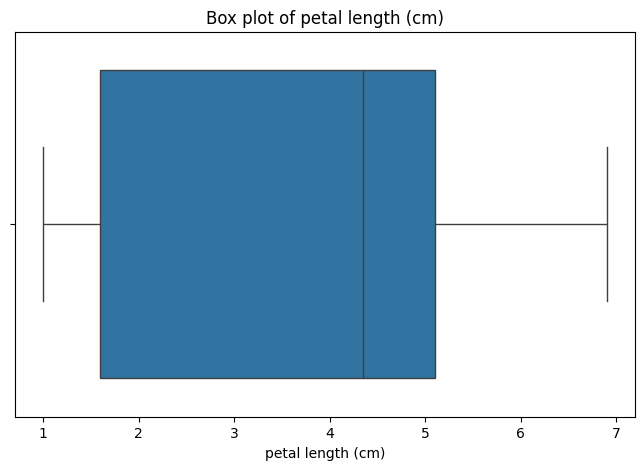

Visualizing distribution for: petal width (cm)


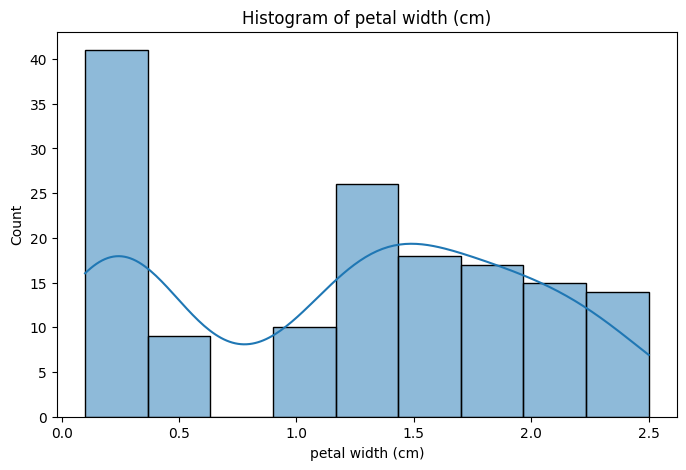

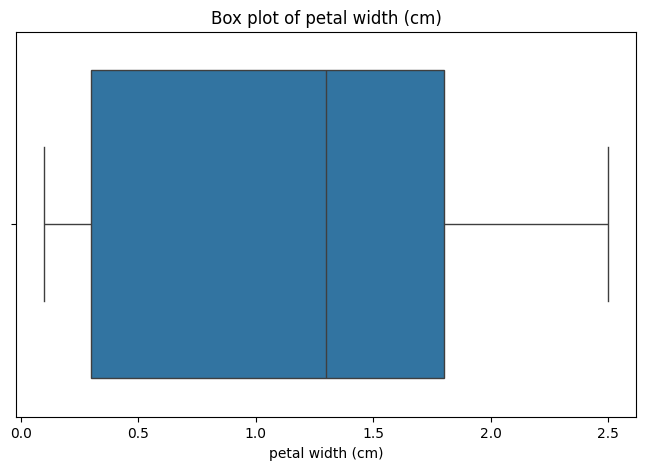

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical columns (excluding 'species')
numerical_cols = df_iris.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'species' in numerical_cols:
    numerical_cols.remove('species')

# Iterate through each numerical column and create plots
for col in numerical_cols:
    print(f"Visualizing distribution for: {col}")

    # Create histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_iris, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    # Create box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_iris, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()

## Visualize relationships

Visualizing relationship between sepal length (cm) and sepal width (cm), colored by species


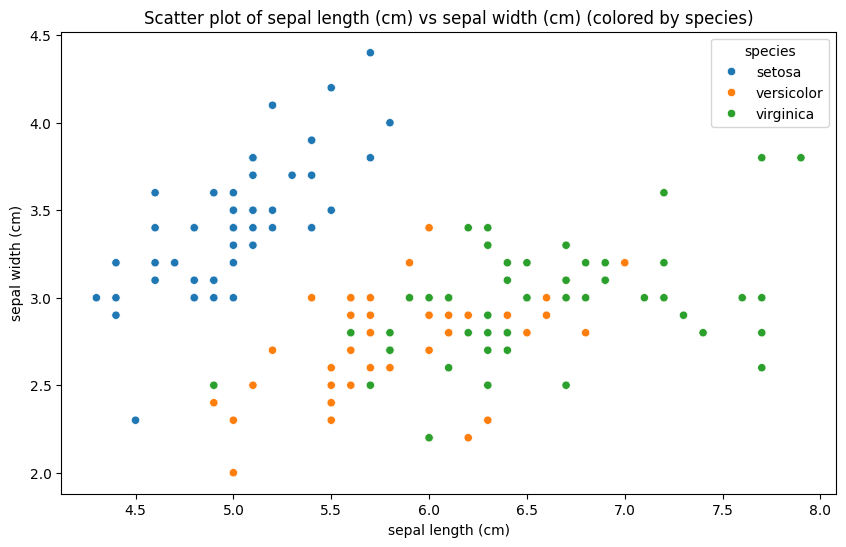

Visualizing relationship between sepal length (cm) and petal length (cm), colored by species


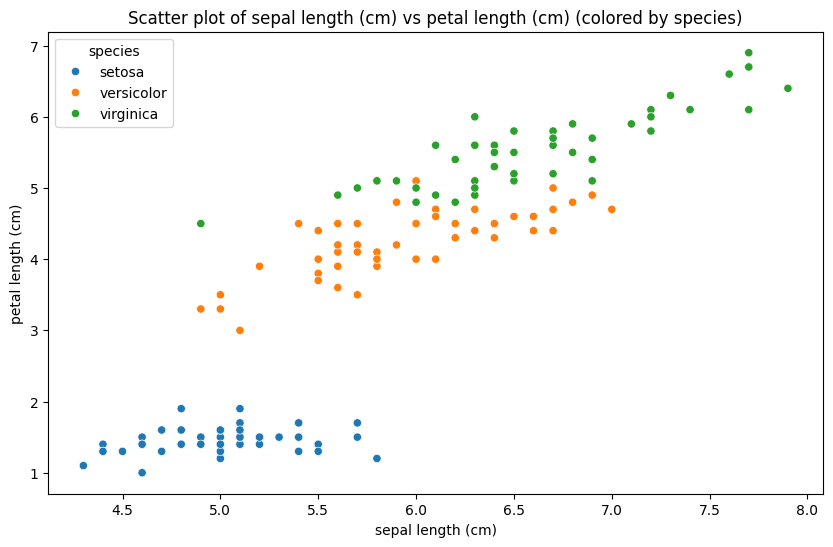

Visualizing relationship between sepal length (cm) and petal width (cm), colored by species


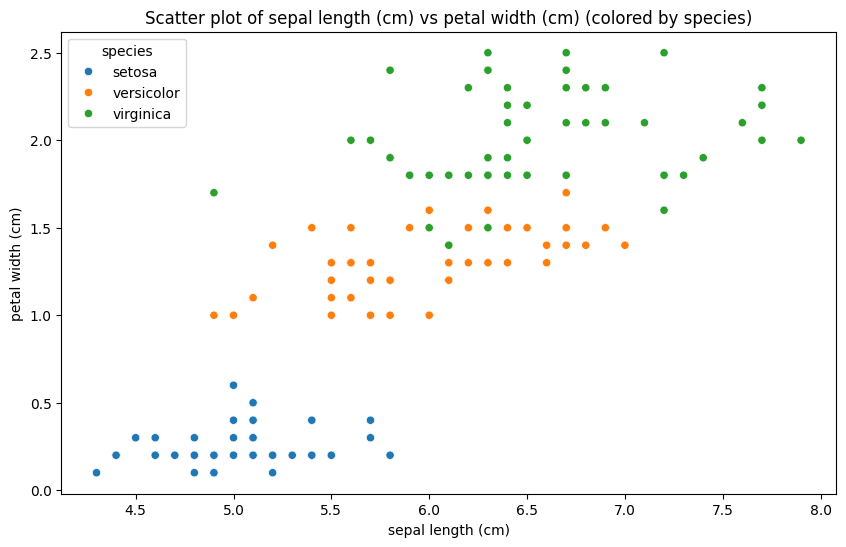

Visualizing relationship between sepal width (cm) and petal length (cm), colored by species


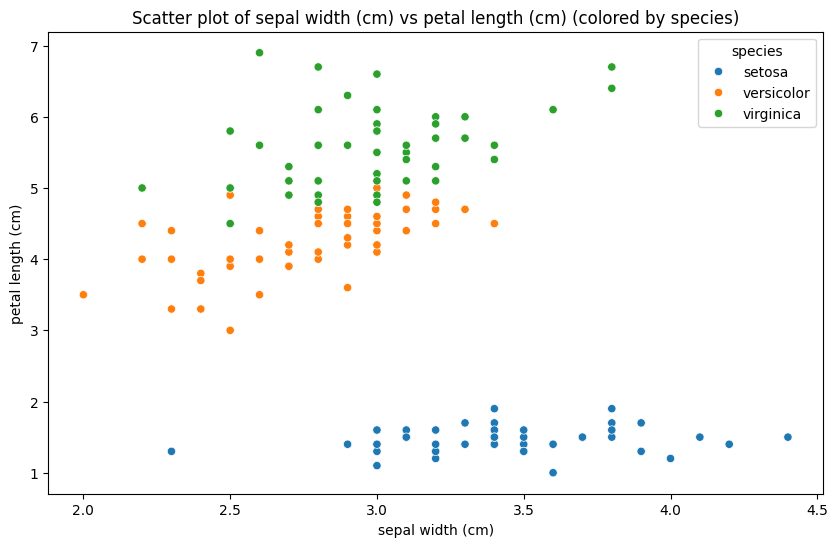

Visualizing relationship between sepal width (cm) and petal width (cm), colored by species


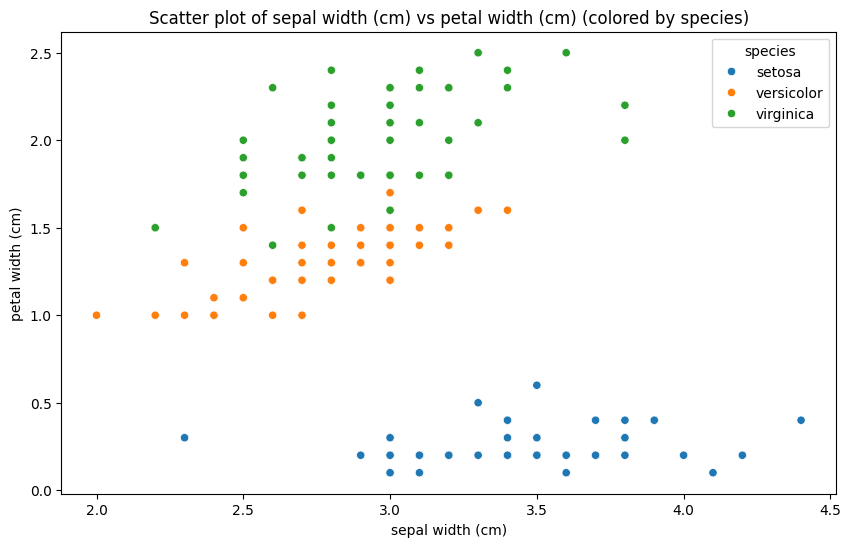

Visualizing relationship between petal length (cm) and petal width (cm), colored by species


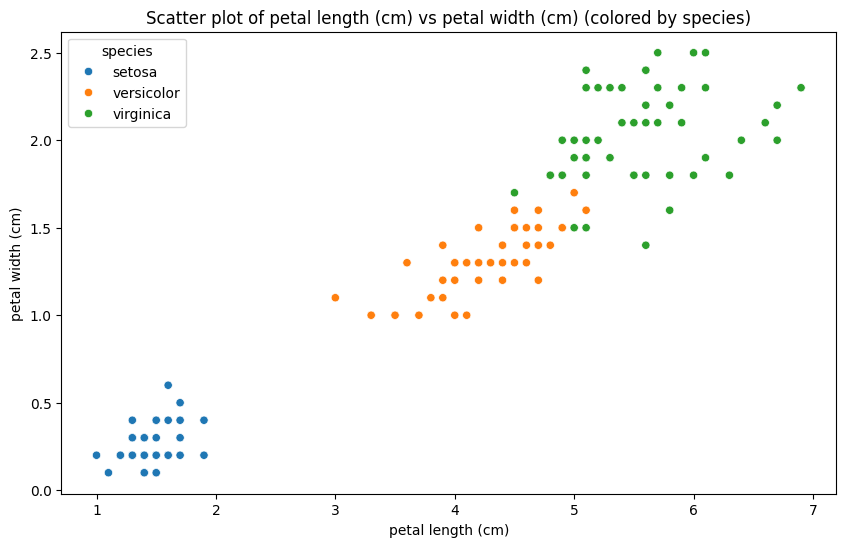

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Get the list of numerical columns (excluding 'species')
numerical_cols = df_iris.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'species' in numerical_cols:
    numerical_cols.remove('species')

# Iterate through all unique pairs of numerical columns
for col1, col2 in itertools.combinations(numerical_cols, 2):
    print(f"Visualizing relationship between {col1} and {col2}, colored by species")

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_iris, x=col1, y=col2, hue='species')
    plt.title(f'Scatter plot of {col1} vs {col2} (colored by species)')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    plt.close()

## Visualize correlations

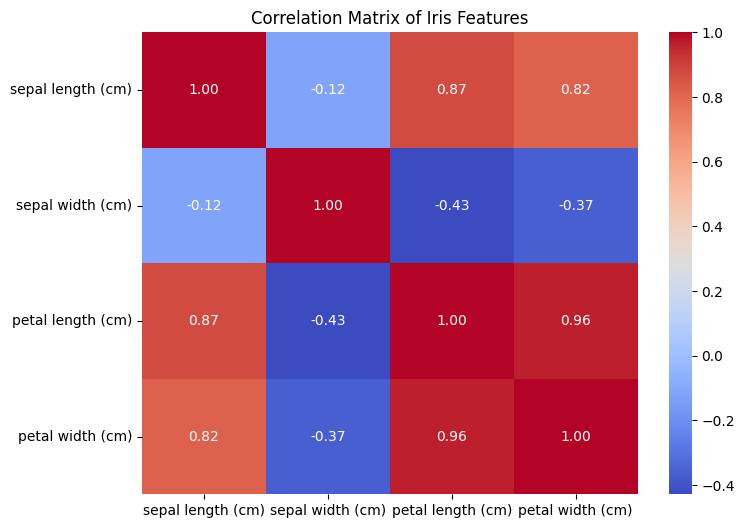

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_df = df_iris.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

## Data Analysis Key Findings

*   The dataset contains 150 samples and 5 columns: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', and 'species'.

*   There are no missing values in the dataset.

*   Summary statistics reveal the range and distribution of the numerical features. For instance, sepal length ranges from 4.3 cm to 7.9 cm, while petal width ranges from 0.1 cm to 2.5 cm.

*   Histograms and box plots show the distribution of each feature, indicating potential skewness or outliers.

*   Scatter plots, colored by species, demonstrate clear separations between species based on combinations of features, particularly involving petal length and petal width.

*   The correlation heatmap shows strong positive correlations between 'petal length (cm)' and 'petal width (cm)' (0.96), 'sepal length (cm)' and 'petal length (cm)' (0.87), and 'sepal length (cm)' and 'petal width (cm)' (0.82). 'Sepal width (cm)' shows weaker correlations with the other features.

*   The strong correlations and distinct clusters observed in the scatter plots suggest that petal length and petal width are highly informative features for classifying iris species.
*   The clear separation of species in the visualizations indicates that a classification model should perform well on this dataset.
